# **Insurance Management System - CS6100 Project** 

By Sri Surya Sameer Vaddhiparthy and Dajana Muho


Under the guidance of Professor Dr. Ajay Gupta

# Data Analytics, Visualization, Model Computation and Predictions

## Imports

### Importing libraries

In [6]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import string
import random
import uuid
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler

### Importing Data

In [7]:
# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Loading the data
df = pd.read_csv (r'telematics_syn-032021.csv')

Current working directory: C:\Users\Surya\Desktop\Report\code\backend


## Understanding the data

In [8]:
df.columns

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity1

### Variable names and descriptions.

#### Traditionally gathered data

Duration - Duration of the insurance coverage of a given policy, in days

Insured.age - Age of insured driver, in years

Insured.sex - Sex of insured driver (Male/Female)

Car.age - Age of vehicle, in years

Marital - Marital status (Single/Married)

Car.use - Use of vehicle: Private, Commute, Farmer, Commercial

Credit.score - Credit score of insured driver

Region - Type of region where driver lives: rural, urban

Annual.miles.drive - Annual miles expected to be driven declared by driver

Years.noclaims - Number of years without any claims

Territory - Territorial location of vehicle


#### Telematically sensed data

Annual.pct.driven - Annualized percentage of time on the road

Total.miles.driven - Total distance driven in miles

Pct.drive.xxx - Percent of driving day xxx of the week: mon/tue/. . . /sun

Pct.drive.xhrs - Percent vehicle driven within x hrs: 2hrs/3hrs/4hrs

Pct.drive.xxx - Percent vehicle driven during xxx: wkday/wkend

Pct.drive.rushxx - Percent of driving during xx rush hours: am/pm

Avgdays.week - Mean number of days used per week

Accel.xxmiles - Number of sudden acceleration 6/8/9/. . . /14 mph/s per 1000 miles

Brake.xxmiles - Number of sudden brakes 6/8/9/. . . /14 mph/s per 1000 miles

Left.turn.intensityxx - Number of left turn per 1000 miles with intensity 08/09/10/11/12

Right.turn.intensityxx - Number of right turn per 1000 miles with intensity 08/09/10/11/12

Response NB_Claim - Number of claims during observation

AMT_Claim - Aggregated amount of claims during observation


Source of dataset description- Article: Synthetic Dataset Generation of Driver Telematics by Banghee So, Jean-Philippe Boucher and Emiliano A. Valdez

#### Summary Statistics

In [310]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,100000.0,314.204060,79.746222,2.700000e+01,200.000000,365.000000,366.000000,366.000000
Insured.age,100000.0,51.378950,15.467075,1.600000e+01,39.000000,51.000000,63.000000,103.000000
Car.age,100000.0,5.639720,4.062135,-2.000000e+00,2.000000,5.000000,8.000000,20.000000
Credit.score,100000.0,800.888870,83.382316,4.220000e+02,766.000000,825.000000,856.000000,900.000000
Annual.miles.drive,100000.0,9124.122908,3826.144730,0.000000e+00,6213.710000,7456.452000,12427.420000,56731.172300
Years.noclaims,100000.0,28.839960,16.123717,0.000000e+00,15.000000,29.000000,41.000000,79.000000
Territory,100000.0,56.531390,24.036518,1.100000e+01,35.000000,62.000000,78.000000,91.000000
Annual.pct.driven,100000.0,0.502294,0.299189,2.739726e-03,0.249315,0.490411,0.753425,1.000000
Total.miles.driven,100000.0,4833.575303,4545.943016,9.529813e-02,1529.897500,3468.287765,6779.876842,47282.603936
Pct.drive.mon,100000.0,0.139365,0.042807,0.000000e+00,0.120894,0.137909,0.155203,0.998172


#### Missing Data

In [20]:
df.isna().sum()

Duration                  0
Insured_age               0
Insured_sex               0
Car_age                   0
Marital                   0
Car_use                   0
Credit_score              0
Region                    0
Annual_miles_drive        0
Years_noclaims            0
Territory                 0
Annual_pct_driven         0
Total_miles_driven        0
Pct_drive_mon             0
Pct_drive_tue             0
Pct_drive_wed             0
Pct_drive_thr             0
Pct_drive_fri             0
Pct_drive_sat             0
Pct_drive_sun             0
Pct_drive_2hrs            0
Pct_drive_3hrs            0
Pct_drive_4hrs            0
Pct_drive_wkday           0
Pct_drive_wkend           0
Pct_drive_rusham          0
Pct_drive_rushpm          0
Avgdays_week              0
Accel_06miles             0
Accel_08miles             0
Accel_09miles             0
Accel_11miles             0
Accel_12miles             0
Accel_14miles             0
Brake_06miles             0
Brake_08miles       

## Dataset customization

### Removing "." and spaces from column names

In [9]:
# getting a list of column names
col_list=df.columns.values.tolist()

#Renaming the columns by replacing "." and with underscores
for i in range(0,len(col_list)):
    col_list[i]=col_list[i].replace(".", "_")

#Removing spaces in variable names
for i in range(0,len(col_list)):
    col_list[i]=col_list[i].replace(" ", "")
#reassigning the new list of column names  
df.columns = col_list

### Removing null values

In [10]:
# Drop rows with null values (if any)
df.dropna(axis = 1)

#Verify number of null values in each column
df.isnull().sum(axis = 0)

Duration                  0
Insured_age               0
Insured_sex               0
Car_age                   0
Marital                   0
Car_use                   0
Credit_score              0
Region                    0
Annual_miles_drive        0
Years_noclaims            0
Territory                 0
Annual_pct_driven         0
Total_miles_driven        0
Pct_drive_mon             0
Pct_drive_tue             0
Pct_drive_wed             0
Pct_drive_thr             0
Pct_drive_fri             0
Pct_drive_sat             0
Pct_drive_sun             0
Pct_drive_2hrs            0
Pct_drive_3hrs            0
Pct_drive_4hrs            0
Pct_drive_wkday           0
Pct_drive_wkend           0
Pct_drive_rusham          0
Pct_drive_rushpm          0
Avgdays_week              0
Accel_06miles             0
Accel_08miles             0
Accel_09miles             0
Accel_11miles             0
Accel_12miles             0
Accel_14miles             0
Brake_06miles             0
Brake_08miles       

### Assigning unique id to each row

In [11]:
df['licensePlate']=df.index+1

original_ids = df['licensePlate'].unique()
DIGITS = 9  # number of hex digits of the UUID to use
new_ids = {cid: int(uuid.uuid4().hex[:DIGITS], base=16) for cid in original_ids}
df['licensePlate'] = df['licensePlate'].map(new_ids)

In [12]:
df['licensePlate'] = df['licensePlate'].astype(str)

u=list(string.ascii_uppercase)
df['licensePlate']=(df['licensePlate'].str.replace('[1-2]',lambda x: random.choice(u)))

C:\Users\Surya\AppData\Local\Temp/ipykernel_6424/3019233714.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['licensePlate']=(df['licensePlate'].str.replace('[1-2]',lambda x: random.choice(u)))


In [13]:
df['licensePlate'].head()

0    68AC404O7V5
1    6579K584X79
2    6W673894A04
3    40P49934X5F
4    C9B500890KQ
Name: licensePlate, dtype: object

In [14]:
df['licensePlate'].nunique()

100000

## Splitting data

### Selecting customer data with a non-zero claim amount.

In [46]:

df_claim = df[df['AMT_Claim']!=0]
df_claim 

,Duration,Insured_age,Insured_sex,Car_age,Marital,Car_use,Credit_score,Region,Annual_miles_drive,Years_noclaims,...,Left_turn_intensity11,Left_turn_intensity12,Right_turn_intensity08,Right_turn_intensity09,Right_turn_intensity10,Right_turn_intensity11,Right_turn_intensity12,NB_Claim,AMT_Claim,licensePlate
0,366,45,Male,-1,Married,Commute,609.0,Urban,6213.710,25,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1,5100.171753,68AC404O7V5
1,182,44,Female,3,Married,Commute,575.0,Urban,12427.420,20,...,24.0,11.0,1099.0,615.0,219.0,101.0,40.0,1,883.554840,6579K584X79
14,366,77,Male,8,Married,Private,814.0,Urban,6213.710,19,...,36.0,16.0,891.0,521.0,222.0,103.0,40.0,1,4438.807984,49358065648
27,365,51,Male,6,Married,Commute,824.0,Urban,12427.420,34,...,2.0,0.0,456.0,157.0,29.0,7.0,2.0,1,356.815796,4P396383B46
42,365,66,Female,5,Married,Private,842.0,Urban,12427.420,45,...,0.0,0.0,206.0,60.0,8.0,2.0,1.0,1,1645.575439,FC58598G3U6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99833,366,45,Male,6,Married,Commute,721.0,Urban,15534.275,11,...,42.0,14.0,1337.0,828.0,348.0,163.0,70.0,1,7130.622070,4735P94447E
99842,366,47,Female,4,Single,Commute,682.0,Urban,12427.420,8,...,0.0,0.0,19.0,10.0,1.0,0.0,0.0,1,3264.178711,645996CN49
99915,328,29,Female,5,Single,Private,593.0,Urban,6213.710,10,...,49.0,21.0,846.0,534.0,221.0,116.0,47.0,1,1964.443360,3943QJK788
99919,366,51,Male,0,Married,Commute,623.0,Urban,6213.710,12,...,143.0,57.0,206.0,113.0,34.0,18.0,9.0,1,8053.883790,E770F89349E


In [47]:
df_claim.describe()

,Duration,Insured_age,Car_age,Credit_score,Annual_miles_drive,Years_noclaims,Territory,Annual_pct_driven,Total_miles_driven,Pct_drive_mon,...,Left_turn_intensity10,Left_turn_intensity11,Left_turn_intensity12,Right_turn_intensity08,Right_turn_intensity09,Right_turn_intensity10,Right_turn_intensity11,Right_turn_intensity12,NB_Claim,AMT_Claim
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,...,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.0,3864.000000
mean,346.751294,46.668996,4.532867,767.590062,9870.118120,23.427795,56.686594,0.749711,8735.144080,0.140253,...,1464.469203,1346.145186,1290.392598,1457.184524,1136.111284,867.412008,746.799948,596.719979,1.0,3561.134915
std,52.047600,14.524704,3.658961,91.600061,3980.113467,14.887444,23.188049,0.249697,5447.035916,0.023870,...,20393.619637,20084.346452,19865.795724,15739.602453,15629.903692,15260.906613,14438.950247,12612.642682,0.0,5402.282838
min,181.000000,18.000000,-2.000000,453.000000,683.508100,0.000000,12.000000,0.035616,67.224394,0.014633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.770279
25%,365.000000,35.000000,1.000000,712.750000,6213.710000,10.000000,35.000000,0.536986,4781.810981,0.125834,...,2.000000,1.000000,0.000000,59.000000,19.000000,4.000000,1.000000,0.000000,1.0,786.272461
50%,366.000000,46.000000,4.000000,788.500000,9320.565000,22.000000,63.000000,0.843836,7763.516700,0.139484,...,15.000000,4.000000,1.000000,352.500000,158.000000,38.000000,13.000000,4.000000,1.0,1988.596069
75%,366.000000,57.000000,7.000000,836.000000,12427.420000,35.000000,76.000000,0.972603,11357.338848,0.153131,...,70.250000,27.000000,9.000000,1064.000000,557.000000,179.250000,79.000000,30.000000,1.0,4037.887665
max,366.000000,90.000000,18.000000,900.000000,31068.550000,74.000000,91.000000,1.000000,41019.575278,0.308958,...,452486.000000,447805.000000,441232.000000,380712.000000,378190.000000,368195.000000,363010.000000,360016.000000,1.0,104074.886700


### Selecting customer data with a zero claim amount.

In [43]:
#getting values with non-zero insurance claim
df_noclaim = df[df['AMT_Claim']==0]
df_noclaim 

,Duration,Insured_age,Insured_sex,Car_age,Marital,Car_use,Credit_score,Region,Annual_miles_drive,Years_noclaims,...,Left_turn_intensity11,Left_turn_intensity12,Right_turn_intensity08,Right_turn_intensity09,Right_turn_intensity10,Right_turn_intensity11,Right_turn_intensity12,NB_Claim,AMT_Claim,licensePlate
2,184,48,Female,6,Married,Commute,847.0,Urban,12427.42,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,6W673894A04
3,183,71,Male,6,Married,Private,842.0,Urban,6213.71,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,40P49934X5F
4,183,84,Male,10,Married,Private,856.0,Urban,6213.71,65,...,0.0,0.0,325.0,111.0,18.0,4.0,2.0,0,0.0,C9B500890KQ
5,365,35,Male,8,Single,Commute,857.0,Urban,12427.42,18,...,13.0,4.0,1217.0,538.0,88.0,18.0,7.0,0,0.0,CB0B69R9459
6,366,23,Female,8,Single,Private,778.0,Urban,12427.42,7,...,0.0,0.0,12.0,4.0,1.0,0.0,0.0,0,0.0,8008C338NI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,182,61,Male,10,Single,Private,824.0,Urban,6213.71,42,...,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0,0.0,68O76465M88
99996,192,48,Male,3,Married,Commute,850.0,Urban,12427.42,32,...,17.0,10.0,357.0,175.0,48.0,22.0,11.0,0,0.0,P9346L30500
99997,184,50,Male,2,Single,Commute,650.0,Rural,6213.71,31,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0,0.0,48D08998986
99998,184,76,Male,2,Married,Private,811.0,Rural,6213.71,58,...,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0,0.0,B9580953JP8


In [44]:
df_noclaim.describe()

,Duration,Insured_age,Car_age,Credit_score,Annual_miles_drive,Years_noclaims,Territory,Annual_pct_driven,Total_miles_driven,Pct_drive_mon,...,Left_turn_intensity10,Left_turn_intensity11,Left_turn_intensity12,Right_turn_intensity08,Right_turn_intensity09,Right_turn_intensity10,Right_turn_intensity11,Right_turn_intensity12,NB_Claim,AMT_Claim
count,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,...,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.0
mean,312.895887,51.568257,5.684208,802.227251,9094.139078,29.057491,56.525152,0.492350,4676.759315,0.139329,...,514.881959,452.822709,413.890374,818.794437,542.103645,304.920155,226.613100,182.758207,0.004244,0.0
std,80.386103,15.473885,4.071238,82.755924,3816.801263,16.133594,24.070091,0.296727,4434.811610,0.043395,...,14410.394180,13908.824389,13413.069740,11433.605213,10407.464057,9150.011679,8686.096459,8382.651168,0.065008,0.0
min,27.000000,16.000000,-2.000000,422.000000,0.000000,0.000000,11.000000,0.002740,0.095298,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,195.000000,39.000000,2.000000,769.000000,6213.710000,15.000000,35.000000,0.243836,1477.942202,0.120650,...,0.000000,0.000000,0.000000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,365.000000,52.000000,5.000000,826.000000,7456.452000,29.000000,62.000000,0.484932,3334.796886,0.137846,...,3.000000,1.000000,0.000000,114.000000,40.000000,7.000000,2.000000,0.000000,0.000000,0.0
75%,366.000000,64.000000,9.000000,856.000000,12427.420000,42.000000,78.000000,0.723288,6533.762006,0.155314,...,29.000000,9.000000,2.000000,664.000000,310.000000,77.000000,26.000000,8.000000,0.000000,0.0
max,366.000000,103.000000,20.000000,900.000000,56731.172300,79.000000,91.000000,1.000000,47282.603936,0.998172,...,794380.000000,793926.000000,793170.000000,841210.000000,841207.000000,841200.000000,841176.000000,841144.000000,1.000000,0.0


### Visualization to understand the data 

#### Age Distribution

array([[<AxesSubplot:title={'center':'Car_age'}>]], dtype=object)

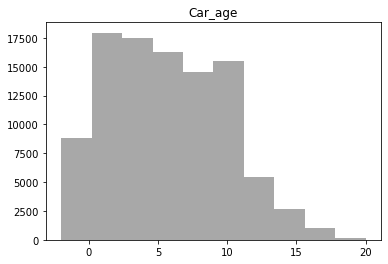

In [45]:
df.hist(column='Car_age', grid=False, color='#A8A8A8')

array([[<AxesSubplot:title={'center':'Insured_age'}>]], dtype=object)

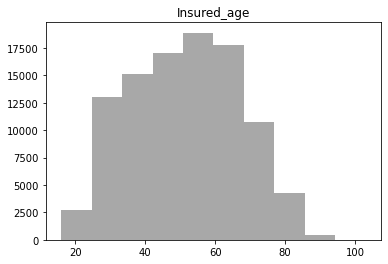

In [323]:
df.hist(column='Insured_age', grid=False, color='#A8A8A8')

<AxesSubplot:xlabel='count', ylabel='AgeGroup'>

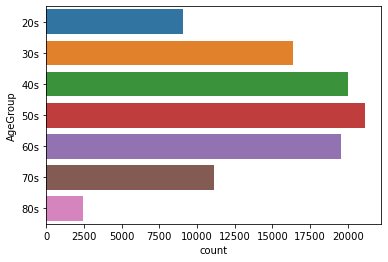

In [324]:
bins=np.arange(20, 100, 10).tolist()
labels = ['20s','30s','40s','50s','60s','70s','80s',]
df['AgeGroup'] = pd.cut(df['Insured_age'], bins=bins, labels=labels, right=False)




sns.countplot(data=df,y='AgeGroup')

In [325]:
df[['Insured_age','AgeGroup']]

,Insured_age,AgeGroup
0,45,40s
1,44,40s
2,48,40s
3,71,70s
4,84,80s
...,...,...
99995,61,60s
99996,48,40s
99997,50,50s
99998,76,70s


array([[<AxesSubplot:title={'center':'Annual_miles_drive'}>]],
      dtype=object)

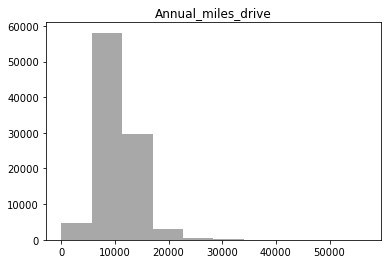

In [21]:
#sns.countplot(data=df,y='AMT_Claim')
df_noclaim.hist(column='Annual_miles_drive', bins=10, grid=False, color='#A8A8A8')

array([[<AxesSubplot:title={'center':'Annual_miles_drive'}>]],
      dtype=object)

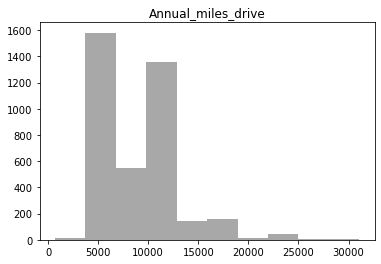

In [327]:
df_claim.hist(column='Annual_miles_drive', bins=10, grid=False, color='#A8A8A8')

array([[<AxesSubplot:title={'center':'Years_noclaims'}>]], dtype=object)

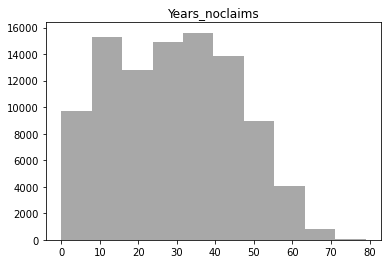

In [328]:
df_noclaim.hist(column='Years_noclaims', bins=10, grid=False, color='#A8A8A8')

In [329]:
bins=np.arange(0, 11000, 1000).tolist()
labels = ['1s','2s','3s','4s','5s','6s','7s','8s','9s','10s']
df['ClaimGroup'] = pd.cut(df['AMT_Claim'], bins=bins, labels=labels, right=False)




In [330]:
bins=np.arange(400, 1100, 100).tolist()
labels = ['400s','500s','600s','700s','800s','900s']
df['CSgroup'] = pd.cut(df['Credit_score'], bins=bins, labels=labels, right=False)




In [331]:
df[['Credit_score','CSgroup']]

,Credit_score,CSgroup
0,609.0,600s
1,575.0,500s
2,847.0,800s
3,842.0,800s
4,856.0,800s
...,...,...
99995,824.0,800s
99996,850.0,800s
99997,650.0,600s
99998,811.0,800s


In [332]:
df_noclaim.describe()

,Duration,Insured_age,Car_age,Credit_score,Annual_miles_drive,Years_noclaims,Territory,Annual_pct_driven,Total_miles_driven,Pct_drive_mon,...,Left_turn_intensity10,Left_turn_intensity11,Left_turn_intensity12,Right_turn_intensity08,Right_turn_intensity09,Right_turn_intensity10,Right_turn_intensity11,Right_turn_intensity12,NB_Claim,AMT_Claim
count,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,...,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.000000,96136.0
mean,312.895887,51.568257,5.684208,802.227251,9094.139078,29.057491,56.525152,0.492350,4676.759315,0.139329,...,514.881959,452.822709,413.890374,818.794437,542.103645,304.920155,226.613100,182.758207,0.004296,0.0
std,80.386103,15.473885,4.071238,82.755924,3816.801263,16.133594,24.070091,0.296727,4434.811610,0.043395,...,14410.394180,13908.824389,13413.069740,11433.605213,10407.464057,9150.011679,8686.096459,8382.651168,0.066194,0.0
min,27.000000,16.000000,-2.000000,422.000000,0.000000,0.000000,11.000000,0.002740,0.095298,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,195.000000,39.000000,2.000000,769.000000,6213.710000,15.000000,35.000000,0.243836,1477.942202,0.120650,...,0.000000,0.000000,0.000000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,365.000000,52.000000,5.000000,826.000000,7456.452000,29.000000,62.000000,0.484932,3334.796886,0.137846,...,3.000000,1.000000,0.000000,114.000000,40.000000,7.000000,2.000000,0.000000,0.000000,0.0
75%,366.000000,64.000000,9.000000,856.000000,12427.420000,42.000000,78.000000,0.723288,6533.762006,0.155314,...,29.000000,9.000000,2.000000,664.000000,310.000000,77.000000,26.000000,8.000000,0.000000,0.0
max,366.000000,103.000000,20.000000,900.000000,56731.172300,79.000000,91.000000,1.000000,47282.603936,0.998172,...,794380.000000,793926.000000,793170.000000,841210.000000,841207.000000,841200.000000,841176.000000,841144.000000,2.000000,0.0


## Logistic Regression model development for Claim(boolean)

### Converting NB_Claim into a binary variable to use for predicting claim or no-claim

In [15]:
df['NB_Claim'] = df['NB_Claim'].replace([2,3],1)

### Feature Engineering for Machine Learning model to predict Claim(boolean)

In [334]:
df.columns

Index(['Duration', 'Insured_age', 'Insured_sex', 'Car_age', 'Marital',
       'Car_use', 'Credit_score', 'Region', 'Annual_miles_drive',
       'Years_noclaims', 'Territory', 'Annual_pct_driven',
       'Total_miles_driven', 'Pct_drive_mon', 'Pct_drive_tue', 'Pct_drive_wed',
       'Pct_drive_thr', 'Pct_drive_fri', 'Pct_drive_sat', 'Pct_drive_sun',
       'Pct_drive_2hrs', 'Pct_drive_3hrs', 'Pct_drive_4hrs', 'Pct_drive_wkday',
       'Pct_drive_wkend', 'Pct_drive_rusham', 'Pct_drive_rushpm',
       'Avgdays_week', 'Accel_06miles', 'Accel_08miles', 'Accel_09miles',
       'Accel_11miles', 'Accel_12miles', 'Accel_14miles', 'Brake_06miles',
       'Brake_08miles', 'Brake_09miles', 'Brake_11miles', 'Brake_12miles',
       'Brake_14miles', 'Left_turn_intensity08', 'Left_turn_intensity09',
       'Left_turn_intensity10', 'Left_turn_intensity11',
       'Left_turn_intensity12', 'Right_turn_intensity08',
       'Right_turn_intensity09', 'Right_turn_intensity10',
       'Right_turn_intensity11'

In [23]:
##Using correlation to select features for NB_Claim
###Correlation with Outcome- Claim Amount
cor=df.corr()
cor_outcome = abs(cor["NB_Claim"])

In [28]:
###Getting list of features with correlation <=0.02 with NB_Claim
low_corr_features = cor_outcome[cor_outcome<=0.02]                  
low_corr_features

Territory                 0.000372
Pct_drive_mon             0.004537
Pct_drive_tue             0.007379
Pct_drive_wed             0.000531
Pct_drive_thr             0.013419
Pct_drive_fri             0.001047
Pct_drive_sat             0.002518
Pct_drive_sun             0.005679
Pct_drive_3hrs            0.011303
Pct_drive_4hrs            0.001521
Pct_drive_wkday           0.004970
Pct_drive_wkend           0.004970
Pct_drive_rusham          0.004490
Accel_08miles             0.006750
Accel_09miles             0.000213
Accel_11miles             0.001120
Accel_12miles             0.001403
Accel_14miles             0.001420
Brake_09miles             0.014620
Brake_11miles             0.004977
Brake_12miles             0.000065
Brake_14miles             0.001468
Left_turn_intensity08     0.014664
Left_turn_intensity09     0.013420
Left_turn_intensity10     0.011179
Left_turn_intensity11     0.010892
Left_turn_intensity12     0.011089
Right_turn_intensity08    0.009481
Right_turn_intensity

In [29]:
###Features with corr value above 0.2 with NB_Claim
abv02_corr_outcome = cor_outcome[cor_outcome>0.02]
abv02_corr_outcome

Duration              0.082858
Insured_age           0.062190
Car_age               0.059088
Credit_score          0.078828
Annual_miles_drive    0.043590
Years_noclaims        0.066323
Annual_pct_driven     0.171985
Total_miles_driven    0.181478
Pct_drive_2hrs        0.024174
Pct_drive_rushpm      0.026586
Avgdays_week          0.049732
Accel_06miles         0.026545
Brake_06miles         0.040644
Brake_08miles         0.034615
NB_Claim              1.000000
AMT_Claim             0.515198
Name: NB_Claim, dtype: float64

In [48]:
#Selecting features with correlation above 0.2 with the final outcome NB_Claim (boolean)
X_df= df[["Duration","Insured_age","Car_age","Credit_score","Annual_miles_drive","Years_noclaims","Annual_pct_driven","Total_miles_driven","Pct_drive_2hrs","Pct_drive_rushpm","Avgdays_week","Accel_06miles","Brake_06miles","Brake_08miles"]]
y_df=df['NB_Claim']

In [49]:
#Split the data into training set and test set. Use train test split() with test size = 0.5
from sklearn.model_selection import train_test_split
X1train, X1test, y1train, y1test = train_test_split(X_df, y_df, test_size = 0.2)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1train = sc.fit_transform(X1train)
X1test = sc.transform(X1test)

### Logistic Regression

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


model3 = LogisticRegression(multi_class='ovr', random_state = 0)
model3.fit(X1train, y1train)
y1test = model3.predict(X1test)

# Model Evaluation
m3_train=model3.score(X1train, y1train)
m3_test=model3.score(X1test, y1test)

In [342]:
print("For the model:", model3, ", the training accuracy is",m3_train,"and the testing accuracy is",m3_test)

For the model: LogisticRegression(multi_class='ovr', random_state=0) , the training accuracy is 0.957525 and the testing accuracy is 1.0


### Random forest classsifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


model4 = RandomForestClassifier(n_estimators = 50, max_depth = 10,min_samples_leaf=1, min_samples_split=2)
model4.fit(X1train, y1train)
y1test = model4.predict(X1test)

# Model Evaluation
m4_train=model4.score(X1train, y1train)
m4_test=model4.score(X1test, y1test)

In [35]:
print("For the model:", model4, ", the training accuracy is",m4_train,"and the testing accuracy is",m4_test)

For the model: RandomForestClassifier(max_depth=10, n_estimators=50) , the training accuracy is 0.9610375 and the testing accuracy is 1.0


### Stochastic Gradient Descent Classifier (SGD-Classifier) - To minimize the cost function of the gradient descent

In [25]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=1000, tol=0.01)
print(sgdc)

xtrain, xtest, ytrain, ytest = train_test_split(X_df, y_df, test_size = 0.15)
sgdc.fit(xtrain, ytrain)

sgdc.fit(xtrain, ytrain)
score = sgdc.score(xtrain, ytrain)
print("Training score: ", score)

ypred = sgdc.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr)

SGDClassifier(tol=0.01)
Training score:  0.9549058823529412
[[14334    40]
 [  626     0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     14374
           1       0.00      0.00      0.00       626

    accuracy                           0.96     15000
   macro avg       0.48      0.50      0.49     15000
weighted avg       0.92      0.96      0.94     15000



## The Challenge

In [50]:
Counter(df['NB_Claim'])

Counter({1: 4272, 0: 95728})

### Introduction to the challenge

array([[<AxesSubplot:title={'center':'NB_Claim'}>]], dtype=object)

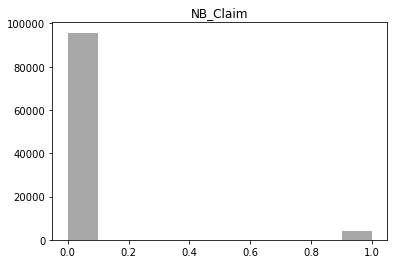

In [51]:
df.hist(column='NB_Claim', grid=False, color='#A8A8A8')

In [42]:
print("The number of rows with no claims is",len(df_noclaim), "and the number of rows with claim data is",len(df_claim), "and hence the claims data percentage is only",len(df_claim)*100/len(df),"percent.")

NameError: name 'df_noclaim' is not defined

Some of the companys may experience low claim rate, as fact in support of this statement 
In 2019, 5.1 percent of insured homes had a claim, according to ISO
source: https://www.iii.org/fact-statistic/facts-statistics-homeowners-and-renters-insurance

### Solution to the challenge - SMOTE (Synthetic Minority Oversampling Technique)

In [55]:
#Selecting features with correlation above 0.2 with the final outcome Claim (boolean)
X_df= df[["Duration","Insured_age","Car_age","Credit_score","Annual_miles_drive","Years_noclaims","Annual_pct_driven","Total_miles_driven","Pct_drive_2hrs","Pct_drive_rushpm","Avgdays_week","Accel_06miles","Brake_06miles","Brake_08miles"]]
y_df=df['NB_Claim']

In [56]:
Counter(y_df)

Counter({1: 4272, 0: 95728})

In [53]:
sample_technique=SMOTE()
X, y = sample_technique.fit_resample(X_df, y_df)
Counter(y)

Counter({1: 95728, 0: 95728})

### Stochastic Gradient Descent Classifier after generating samples with Synthetic Minority Oversampling Technique

In [54]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=1000, tol=0.01,loss='log')
print(sgdc)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.15)
sgdc.fit(xtrain, ytrain)

sgdc.fit(xtrain, ytrain)
score = sgdc.score(xtrain, ytrain)
print("The training score for SGDC-SMOTE is ", score)

ypred = sgdc.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr)

SGDClassifier(loss='log', tol=0.01)
The training score for SGDC-SMOTE is  0.7037367040070789
[[ 8264  6173]
 [ 2301 11981]]
              precision    recall  f1-score   support

           0       0.78      0.57      0.66     14437
           1       0.66      0.84      0.74     14282

    accuracy                           0.70     28719
   macro avg       0.72      0.71      0.70     28719
weighted avg       0.72      0.70      0.70     28719



In [58]:
sample_technique=SMOTETomek()
X, y = sample_technique.fit_resample(X_df, y_df)
Counter(y)

Counter({1: 95427, 0: 95427})

### Stochastic Gradient Descent Classifier after generating samples with SMOTE-TOMEK Links Method

In [59]:
from sklearn.linear_model import SGDClassifier

sgdc2 = SGDClassifier(max_iter=1000, tol=0.01)
print(sgdc2)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.15)
sgdc2.fit(xtrain, ytrain)

sgdc2.fit(xtrain, ytrain)
score = sgdc2.score(xtrain, ytrain)
print("The training score for SGDC-SMOTE-TOMEK is : ", score)

ypred = sgdc2.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)

cr = classification_report(ytest, ypred)
print(cr)

SGDClassifier(tol=0.01)
The training score for SGDC-SMOTE-TOMEK is :  0.5510617968870396
[[ 1546 12776]
 [  110 14197]]
              precision    recall  f1-score   support

           0       0.93      0.11      0.19     14322
           1       0.53      0.99      0.69     14307

    accuracy                           0.55     28629
   macro avg       0.73      0.55      0.44     28629
weighted avg       0.73      0.55      0.44     28629



In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.15)

xgbc = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
print(xgbc)

xgbc.fit(xtrain, ytrain)

# - cross validataion
scores = cross_val_score(xgbc, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbc.predict(xtest)
cm = confusion_matrix(ytest,ypred)
print(cm)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='logloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None)
Mean cross-validation score: 0.96
K-fold CV average score: 0.96
[[13868   356]
 [  707 13693]]


## Predicting values for Claim(boolean)

In [64]:
df["predictedClaimValue"]= sgdc.predict(X_df)

In [65]:
df['predictedClaimValue'] = df['predictedClaimValue'].astype(bool)

In [66]:
df[["predictedClaimValue","NB_Claim"]].tail()

,predictedClaimValue,NB_Claim
99995,False,0
99996,False,0
99997,False,0
99998,False,0
99999,False,0


## Importing the final dataset to csv for transfer to front end

In [358]:
df.columns

Index(['Duration', 'Insured_age', 'Insured_sex', 'Car_age', 'Marital',
       'Car_use', 'Credit_score', 'Region', 'Annual_miles_drive',
       'Years_noclaims', 'Territory', 'Annual_pct_driven',
       'Total_miles_driven', 'Pct_drive_mon', 'Pct_drive_tue', 'Pct_drive_wed',
       'Pct_drive_thr', 'Pct_drive_fri', 'Pct_drive_sat', 'Pct_drive_sun',
       'Pct_drive_2hrs', 'Pct_drive_3hrs', 'Pct_drive_4hrs', 'Pct_drive_wkday',
       'Pct_drive_wkend', 'Pct_drive_rusham', 'Pct_drive_rushpm',
       'Avgdays_week', 'Accel_06miles', 'Accel_08miles', 'Accel_09miles',
       'Accel_11miles', 'Accel_12miles', 'Accel_14miles', 'Brake_06miles',
       'Brake_08miles', 'Brake_09miles', 'Brake_11miles', 'Brake_12miles',
       'Brake_14miles', 'Left_turn_intensity08', 'Left_turn_intensity09',
       'Left_turn_intensity10', 'Left_turn_intensity11',
       'Left_turn_intensity12', 'Right_turn_intensity08',
       'Right_turn_intensity09', 'Right_turn_intensity10',
       'Right_turn_intensity11'

In [67]:
df_ui=df[[
        "licensePlate",        
        "Left_turn_intensity08",
        "Left_turn_intensity09",
        "Left_turn_intensity10",
        "Left_turn_intensity11",
        "Left_turn_intensity12",
        "Pct_drive_mon",
        "Pct_drive_tue",
        "Pct_drive_wed",
        "Pct_drive_thr",
        "Pct_drive_fri",
        "Pct_drive_sat",
        "Pct_drive_sun",
        "Right_turn_intensity08",
        "Right_turn_intensity09",
        "Right_turn_intensity10",
        "Right_turn_intensity11",
        "Right_turn_intensity12",
        "Accel_06miles",
        "Accel_08miles",
        "Accel_09miles",
        "Accel_11miles",
        "Accel_12miles",
        "Accel_14miles",
        "Brake_06miles",
        "Brake_08miles",
        "Brake_09miles",
        "Brake_11miles",
        "Brake_12miles",
        "Brake_14miles",
        "predictedClaimValue"]]

In [68]:
df_ui.to_csv('telematics_ui.csv')

In [69]:
selected=df_ui.iloc[5030:5050].to_dict(orient='index')

In [70]:
to_json=list(selected.values())

In [72]:
to_json


[{'licensePlate': 'N0700990669',
  'Left_turn_intensity08': 0.0,
  'Left_turn_intensity09': 0.0,
  'Left_turn_intensity10': 0.0,
  'Left_turn_intensity11': 0.0,
  'Left_turn_intensity12': 0.0,
  'Pct_drive_mon': 0.133938067,
  'Pct_drive_tue': 0.171810682,
  'Pct_drive_wed': 0.234837918,
  'Pct_drive_thr': 0.193674109,
  'Pct_drive_fri': 0.110159078,
  'Pct_drive_sat': 0.062476984,
  'Pct_drive_sun': 0.093103163,
  'Right_turn_intensity08': 5.0,
  'Right_turn_intensity09': 0.0,
  'Right_turn_intensity10': 0.0,
  'Right_turn_intensity11': 0.0,
  'Right_turn_intensity12': 0.0,
  'Accel_06miles': 39.0,
  'Accel_08miles': 1.0,
  'Accel_09miles': 0.0,
  'Accel_11miles': 0.0,
  'Accel_12miles': 0.0,
  'Accel_14miles': 0.0,
  'Brake_06miles': 103.0,
  'Brake_08miles': 7.0,
  'Brake_09miles': 1.0,
  'Brake_11miles': 0.0,
  'Brake_12miles': 0.0,
  'Brake_14miles': 0.0,
  'predictedClaimValue': False},
 {'licensePlate': '3A08466Z97',
  'Left_turn_intensity08': 1477.0,
  'Left_turn_intensity09': 

In [71]:
import json
with open('data.json', 'w') as f:
    json.dump(to_json, f)

## Future Scope with aid of more real world data:

1. More data will lead to increased accuracy of the Machine Learning model in predicting the Claim (True/False) and also computing the potential claim amount.
2. The process of Usage based Auto-insurance quote generation can be made more ML-Centric and highly automated by integrating our system into the existing insurance quote computing mechanisms.
3. Make the usage based insurance system a selling point by generating personalized savings computation based on user data inputs.

## References for source of data, description of dataset variables

1. Article: Synthetic Dataset Generation of Driver Telematics by Banghee So, Jean-Philippe Boucher and Emiliano A. Valdez
https://arxiv.org/abs/2102.00252

2. Sample projects listed in the class website.
https://cs.wmich.edu/gupta/teaching/cs6100/6100BigDataF21web/CS%206100%20Project%20Guidelines.html

3. SMOTE-TOMEK Technique
https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

4.SMOTE Technique
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

